In [1]:
import sys                                          # System bindings
import cv2                                          # OpenCV bindings
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imagePath = "./doodleHistory/1.jpg"

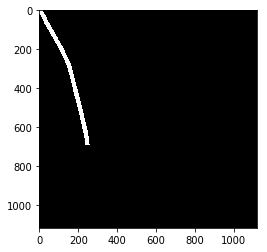

In [3]:
im = cv2.imread(imagePath)
plt.imshow(im)

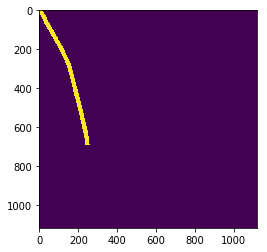

In [4]:
#gray
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plt.imshow(im)

In [5]:
thresh = 127
im_bw = cv2.threshold(im, thresh, 255, cv2.THRESH_BINARY)[1]

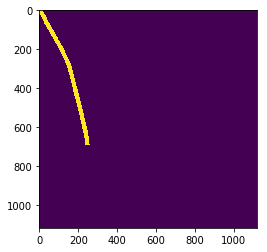

In [6]:
plt.imshow(im_bw)

In [7]:
n_white_pix = np.sum(im_bw == 255)
n_white_pix

16489

In [8]:
n_black_pix = np.sum(im_bw == 0)
n_black_pix

1235672

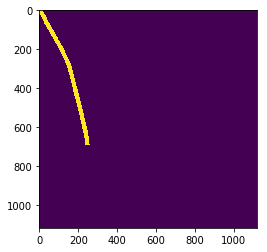

In [9]:
if n_white_pix > n_black_pix:
    im_bw = cv2.bitwise_not(im_bw)
plt.imshow(im_bw)

In [10]:
# # remove row


        
# plt.imshow(im)

In [11]:


        
# plt.imshow(im)

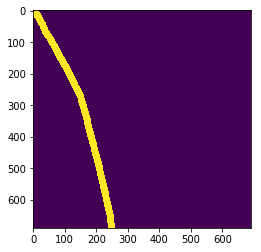

In [12]:
#get how many zeros in the begining x, , and the end of a row x2, 
#get how many zeros in the begining y, and the end of a colomn y2
im = im_bw
size = len(im[0])
sum0 = im.sum(axis = 0)
sum1 = im.sum(axis = 1)

for i in range(len(sum0)):
    if sum0[i] == 0:
        im = np.delete(im, 0, 1)
        zero = np.zeros((size,1))
        im = np.append(im,zero,1)
    else :
        break

for i in range(len(sum1)):
    if sum1[i] == 0:
        im = np.delete(im, 0, 0)
        zero = np.zeros((1,size))
        im = np.append(im,zero,0)
    else :
        break

sum0 = im.sum(axis = 0)
sum1 = im.sum(axis = 1)

# x= 0
x2 = 1
# y= 0
y2 = 1

# while sum0[x] ==0:
#     x += 1

while sum0[-x2] ==0:
    x2 += 1

# while sum1[y] ==0:
#     y += 1

while sum1[-y2] ==0:
    y2 += 1

w = size - x2
h = size - y2

contentSize = w if w > h  else  h
    
contentSize
im = im[0:contentSize, 0:contentSize]

plt.imshow(im)



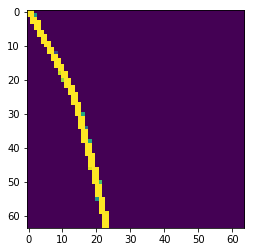

In [13]:
im = cv2.resize(im, (64, 64))

plt.imshow(im)